<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Préparer-les-données" data-toc-modified-id="Préparer-les-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Préparer les données</a></span><ul class="toc-item"><li><span><a href="#products.csv" data-toc-modified-id="products.csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>products.csv</a></span><ul class="toc-item"><li><span><a href="#Traiter-le-prix-inférieur-à-0;-(T_0)" data-toc-modified-id="Traiter-le-prix-inférieur-à-0;-(T_0)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Traiter le prix inférieur à 0; (T_0)</a></span></li></ul></li><li><span><a href="#transactions.csv" data-toc-modified-id="transactions.csv-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>transactions.csv</a></span><ul class="toc-item"><li><span><a href="#traiter-les-transactions-pour-le-test-avec-les-temps-de-transactions-presque-pareils-(T_0)" data-toc-modified-id="traiter-les-transactions-pour-le-test-avec-les-temps-de-transactions-presque-pareils-(T_0)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>traiter les transactions pour le test avec les temps de transactions presque pareils (T_0)</a></span></li><li><span><a href="#l'unicité" data-toc-modified-id="l'unicité-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>l'unicité</a></span></li></ul></li><li><span><a href="#customers.csv" data-toc-modified-id="customers.csv-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>customers.csv</a></span><ul class="toc-item"><li><span><a href="#ajouter-la-colonne-'age'" data-toc-modified-id="ajouter-la-colonne-'age'-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>ajouter la colonne 'age'</a></span></li></ul></li><li><span><a href="#La-jointure-de-'df_product',-'df_trans',-'df_cus'" data-toc-modified-id="La-jointure-de-'df_product',-'df_trans',-'df_cus'-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>La jointure de 'df_product', 'df_trans', 'df_cus'</a></span></li><li><span><a href="#traiter-les-valeurs-manquantes-(id_prod:-0_2245)" data-toc-modified-id="traiter-les-valeurs-manquantes-(id_prod:-0_2245)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>traiter les valeurs manquantes (id_prod: 0_2245)</a></span><ul class="toc-item"><li><span><a href="#ajouter-le-catégorie-pour-le-produit-'0_2245'" data-toc-modified-id="ajouter-le-catégorie-pour-le-produit-'0_2245'-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>ajouter le catégorie pour le produit '0_2245'</a></span></li><li><span><a href="#imputer-les-prix-pour-le-produit-'0_2245'" data-toc-modified-id="imputer-les-prix-pour-le-produit-'0_2245'-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>imputer les prix pour le produit '0_2245'</a></span></li></ul></li><li><span><a href="#calculer-le-chiffre-d'affaire-(CA)-de-chaque-transaction" data-toc-modified-id="calculer-le-chiffre-d'affaire-(CA)-de-chaque-transaction-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>calculer le chiffre d'affaire (CA) de chaque transaction</a></span></li></ul></li><li><span><a href="#l'exportation-de-données" data-toc-modified-id="l'exportation-de-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>l'exportation de données</a></span></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Préparer les données

## products.csv

L'importation de données

In [2]:
df_product = pd.read_csv('products.csv')
df_product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [3]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


<font color = Indigo> ***Il n'y a pas de valeur manquante.** </font>

In [4]:
# verifier s'il y a valeur doublon pour 'id_prod'
any(df_product['id_prod'].duplicated())

False

<font color = Indigo> ***Il n'y a pas de valeur doublon.** </font>

In [5]:
df_product.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


<font color = Indigo> ***le prix moyenne de tous les livres est 21.86 euro. Il y a de prix inférieur à 0** </font>

<font color = Indigo> **les prix moyennes de chaque catégorie:** </font>

In [6]:
# calculer les prix moyennes de chaque catégorie
df_cmean = df_product.groupby(by = 'categ').mean()[['price']]
df_cmean

,price
categ,
0,11.727280
1,25.531421
2,108.354686


<AxesSubplot:xlabel='categ', ylabel='price'>

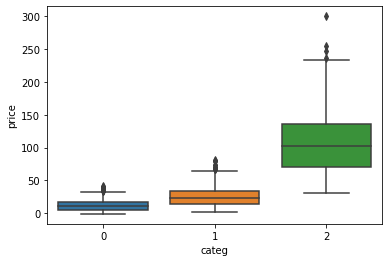

In [7]:
# ultiliser le graphique boîte et moustache pour présentater la dispersion de donées
%matplotlib inline
sns.boxplot( x = df_product['categ'], y = df_product['price'])

<font color = Indigo> ***Il y a des outliers mais on les garder en ce moment pour eviter l'impact de notre analyse de chiffre d'affaire suivants. Les outliers peuvent correspondre aux livres qui coûtent chers.** </font>

### Traiter le prix inférieur à 0; (T_0)

<font color = Indigo> En fonction des analyses suivants (dans la partie 1.2.1. traiter les dates), le prix < 0 euro correspond au produit 'T_0', qui est le produit géneré pour le test de système par les developpeurs. Pour notre analyse, il faut l'exclure. </font>

In [8]:
# verifier le prix qui est inférieur à 0 euro
df_product.loc[df_product['price'] < 0, :]

,id_prod,price,categ
731,T_0,-1.0,0


In [9]:
# Exclure le produit avec le prix < 0 euro
df_product = df_product.loc[df_product['price'] >= 0, :]
df_product['price'].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

## transactions.csv

L'importation de données

In [10]:
df_trans = pd.read_csv ('transactions.csv')
df_trans.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [11]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


<font color = Indigo> ***Il n'y a pas de valeur manquante, mais le format de 'date' n'est pas correct.** </font>

### traiter les transactions pour le test avec les temps de transactions presque pareils (T_0)

In [12]:
df_trans.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


<font color = Indigo> ***Il y a des dates anormaux** </font>

In [13]:
# ajouter une colonne pour verifier les dates avec les formats anormaux
df_trans['date_test'] = df_trans['date'].copy()

# transférer les formats anormaux à NaT
df_trans['date_test'] = pd.to_datetime(df_trans['date_test'], errors = 'coerce')
print(df_trans.dtypes)

# verifier la liste de date anormal
df_null_time = df_trans.loc[df_trans['date_test'].isnull(), :]
df_null_time

id_prod               object
date                  object
session_id            object
client_id             object
date_test     datetime64[ns]
dtype: object


,id_prod,date,session_id,client_id,date_test
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,NaT
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,NaT
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,NaT
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,NaT
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,NaT
...,...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0,NaT
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1,NaT
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,NaT
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1,NaT


In [14]:
df_null_time['id_prod'].describe()

count     200
unique      1
top       T_0
freq      200
Name: id_prod, dtype: object

<font color = Indigo> ***Comme discuté dans la partie "1.1.1. La dispersion de donées? Valeur aberrant?", les 200 lignes de transactions avec le même id_prod, et les temps de transactions presque pareils, sont les transactions génerés pour le test de système par les développeurs. Pour notre analyse, il faut les supprimer.** </font>

In [15]:
# supprimer les valeurs manquants pour la colonne ['date_test'] pour supprimer les valeurs anormaux
df_trans = df_trans.dropna(subset = ['date_test'])
any(df_trans['date_test'].isnull()) # verifier s'il y a autre ligne avec valeurs anormaux

False

In [16]:
# supprimer la colonne 'date_test' après l'utilisation
df_trans = df_trans.drop('date_test', axis = 1)

# transferer la format de 'date' à datetime
df_trans['date'] = pd.to_datetime(df_trans['date'])
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


### l'unicité

In [17]:
df_trans[['id_prod', 'session_id', 'client_id']].describe()

,id_prod,session_id,client_id
count,679332,679332,679332
unique,3266,342315,8600
top,1_369,s_118668,c_1609
freq,2252,14,25488


## customers.csv

L'importation de données

In [18]:
df_cus = pd.read_csv('customers.csv')
df_cus.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [19]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


<font color = Indigo> ***Il n'y a pas de valeur manquante.** </font>

In [20]:
df_cus[['client_id', 'sex']].describe()

,client_id,sex
count,8623,8623
unique,8623,2
top,c_4410,f
freq,1,4491


<font color = Indigo> ***Il n'y a pas de valeur doublon.** </font>

### ajouter la colonne 'age'

In [21]:
# calculer la colonne 'age'
df_cus['age'] = 2022 - df_cus['birth']
df_cus['age'] = df_cus['age'].astype('int64')
df_cus['age'].describe()

count    8623.000000
mean       43.719123
std        16.919535
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        93.000000
Name: age, dtype: float64

<font color = Indigo> ***Il n'y a pas de valeur aberrant.** </font>

## La jointure de 'df_product', 'df_trans', 'df_cus'

<font color = Indigo> ***outer join 'df_trans' et 'df_product': pour garder tous les produits (même si les 0 vente) et tous les transactions.** </font>

<font color = Indigo> ***left join 'df_temp1' et 'df_cus': pour garder tous les produits (même si les 0 vente) et tous les transactions.** </font>

In [22]:
# la jointure de 3 dateframes avec outer joint et left joint
df_temp1 = pd.merge(df_trans, df_product, on = 'id_prod', how = 'outer') 
df = pd.merge(df_temp1, df_cus, on = 'client_id', how = 'left')
df.index.name='index' 
df.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
index,,,,,,,,,
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986.0,36.0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,m,1985.0,37.0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,f,1974.0,48.0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,f,1962.0,60.0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,f,1976.0,46.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679353 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679132 non-null  float64       
 5   categ       679132 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  float64       
 8   age         679332 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 51.8+ MB


In [24]:
df.describe()

,price,categ,birth,age
count,679132.000000,679132.000000,679332.000000,679332.000000
mean,17.455405,0.441951,1977.811139,44.188861
std,18.331641,0.595046,13.574553,13.574553
min,0.620000,0.000000,1929.000000,18.000000
25%,8.870000,0.000000,1970.000000,35.000000
50%,13.990000,0.000000,1980.000000,42.000000
75%,18.990000,1.000000,1987.000000,52.000000
max,300.000000,2.000000,2004.000000,93.000000


## traiter les valeurs manquantes (id_prod: 0_2245)

In [25]:
# selectionner les lignes avec prix manquantes
df_null = df.loc[df['price'].isnull(),:]

# verifier l'information de cettes lignes
df_null[['id_prod','session_id','client_id','sex']].describe()

,id_prod,session_id,client_id,sex
count,221,221,221,221
unique,1,221,100,2
top,0_2245,s_272266,c_1533,f
freq,221,1,6,117


In [26]:
# verifier s'il y a 'id_prod: 0_2245' dans la liste de produit
any(df_product['id_prod']=='0_2245')

False

<font color = Indigo> ***Il y a un produit sans id_prod correspondant.** </font>

In [27]:
# verifier l'information de cettes lignes
df_null

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
index,,,,,,,,,
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,m,1940.0,82.0
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,f,1963.0,59.0
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,m,1978.0,44.0
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,m,1991.0,31.0
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,m,1973.0,49.0
...,...,...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,m,1981.0,41.0
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,f,1979.0,43.0
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,m,1981.0,41.0


### ajouter le catégorie pour le produit '0_2245'

In [28]:
df_product.head(12)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0


<font color = Indigo> ***le premier numéro (0,1,2) de 'id_prod' indique la catégorie de chaque produit (0,1,2). '0_2245' est dans la categ 0.** </font>

In [29]:
# ajouter le catégory '0' pour le produit '0_2245'
df['categ'] = df['categ'].fillna(0)

### imputer les prix pour le produit '0_2245'

In [30]:
# calculé déjà les prix moyenne de chaque catégorie dans la partie 1.1. products.csv
df_cmean

,price
categ,
0,11.727280
1,25.531421
2,108.354686


<font color = Indigo> ***imputer le prix de '0_2245' par 11.73 euro, le prix moyenne de categ 0** </font>

In [31]:
# imputer les prix null avec le moyenne de prix de tous les livres
df['price'] = df['price'].fillna(11.73)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679353 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679353 non-null  float64       
 5   categ       679353 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  float64       
 8   age         679332 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 51.8+ MB


In [32]:
# reverifier les transactions pour '0_2245'
df.loc[df['id_prod']=='0_2245']

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
index,,,,,,,,,
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,11.73,0.0,m,1940.0,82.0
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,11.73,0.0,f,1963.0,59.0
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,11.73,0.0,m,1978.0,44.0
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,11.73,0.0,m,1991.0,31.0
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,11.73,0.0,m,1973.0,49.0
...,...,...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,11.73,0.0,m,1981.0,41.0
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,11.73,0.0,f,1979.0,43.0
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,11.73,0.0,m,1981.0,41.0


## calculer le chiffre d'affaire (CA) de chaque transaction

In [33]:
df['CA'] = df.loc[df['session_id'].notnull(), 'price']
df['CA'] = df['CA'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679353 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679353 non-null  float64       
 5   categ       679353 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  float64       
 8   age         679332 non-null  float64       
 9   CA          679353 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 57.0+ MB


# l'exportation de données

In [34]:
# verifier encore une fois le dateframe 'df'
df

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,CA
index,,,,,,,,,,
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986.0,36.0,4.18
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,m,1985.0,37.0,4.18
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,f,1974.0,48.0,4.18
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,f,1962.0,60.0,4.18
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,f,1976.0,46.0,4.18
...,...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,24.50,0.0,NaN,NaN,NaN,0.00
679349,2_86,NaT,NaN,NaN,132.36,2.0,NaN,NaN,NaN,0.00
679350,0_299,NaT,NaN,NaN,22.99,0.0,NaN,NaN,NaN,0.00


In [35]:
# exporter les données pour la partie d'analyse
df.to_csv('df_library.csv')

Les autres traitements:
1. Les transactions manquants en 2021-10: 
sera traiter prochainement d'après les besoins des analyses suivantes
2. Clients 18 ans:
discussion dans prochaine partie
3. Les formats de datetime:
traiter dans la 2e partie après l'importation de donnés